In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('fraud_detection_300.csv')
df.head()

,transaction_id,amount,transaction_time_sec,customer_age,location_mismatch,device_trust_score,previous_fraud_count,fraud
0,1,1875.83,66412,51,0,0.56,1,0
1,2,4753.82,58335,58,0,0.07,1,1
2,3,3661.31,56179,52,0,0.78,0,0
3,4,2995.30,32093,18,0,0.45,0,1
4,5,784.31,69678,38,0,0.52,0,1


In [5]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   transaction_id        300 non-null    int64  
 1   amount                300 non-null    float64
 2   transaction_time_sec  300 non-null    int64  
 3   customer_age          300 non-null    int64  
 4   location_mismatch     300 non-null    int64  
 5   device_trust_score    300 non-null    float64
 6   previous_fraud_count  300 non-null    int64  
 7   fraud                 300 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB
None
transaction_id          0
amount                  0
transaction_time_sec    0
customer_age            0
location_mismatch       0
device_trust_score      0
previous_fraud_count    0
fraud                   0
dtype: int64


In [6]:
df.columns

Index(['transaction_id', 'amount', 'transaction_time_sec', 'customer_age',
       'location_mismatch', 'device_trust_score', 'previous_fraud_count',
       'fraud'],
      dtype='object')

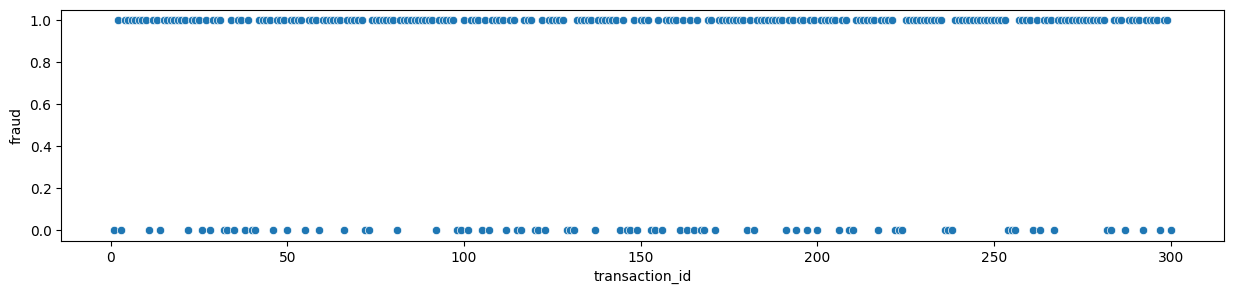

In [13]:
#visualiztion
plt.figure(figsize=(15,3))
sns.scatterplot(x='transaction_id', y='fraud', data=df)
plt.show()

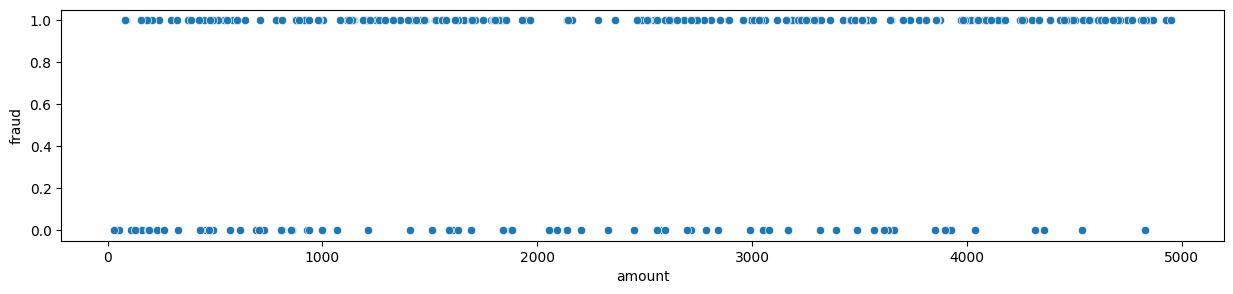

In [14]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='amount', y='fraud', data=df)
plt.show()

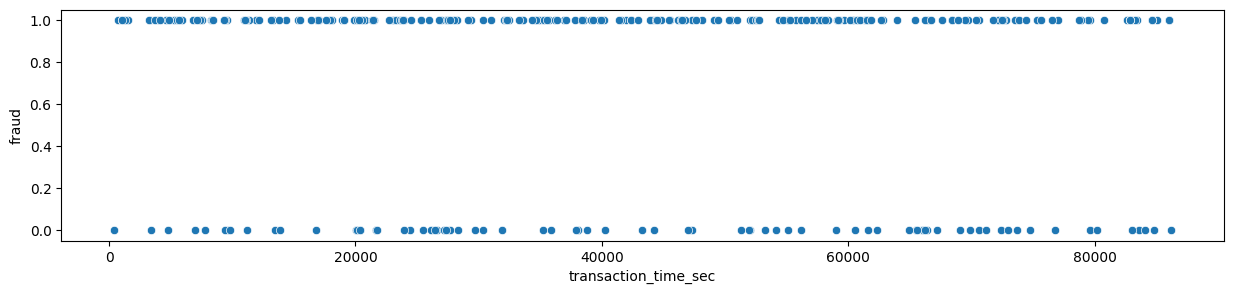

In [15]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='transaction_time_sec', y='fraud', data=df)
plt.show()

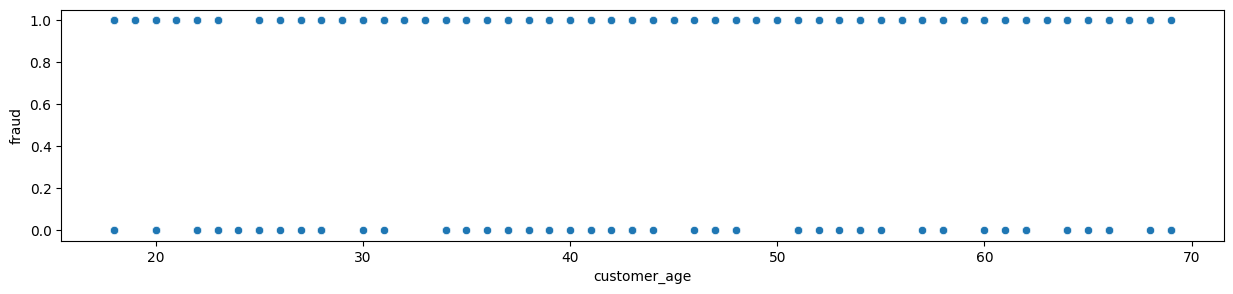

In [16]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='customer_age', y='fraud', data=df)
plt.show()

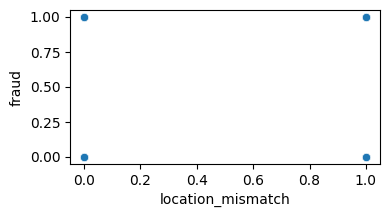

In [21]:
plt.figure(figsize=(4,2))
sns.scatterplot(x='location_mismatch', y='fraud', data=df)
plt.show()

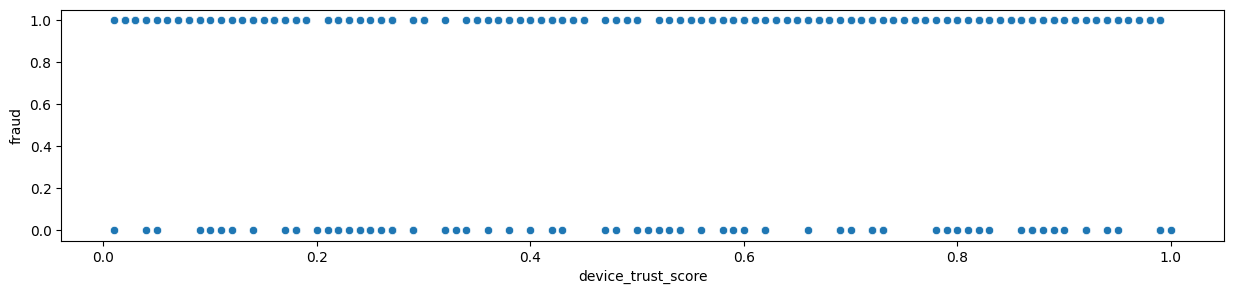

In [18]:
plt.figure(figsize=(15,3))
sns.scatterplot(x='device_trust_score', y='fraud', data=df)
plt.show()

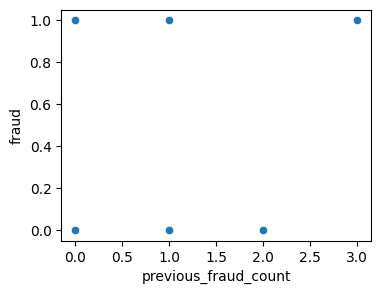

In [22]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='previous_fraud_count', y='fraud', data=df)
plt.show()

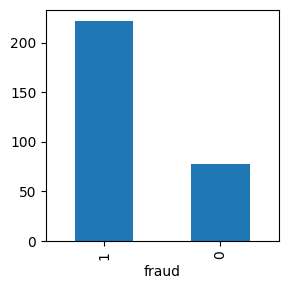

In [26]:
plt.figure(figsize=(3,3))
df['fraud'].value_counts().plot(kind='bar')
plt.show()

In [28]:
#Features & Target
x = df[['transaction_id', 'amount', 'transaction_time_sec', 'customer_age',
       'location_mismatch', 'device_trust_score', 'previous_fraud_count']]
y = df[['fraud']]

In [29]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
xtrain.head()

,transaction_id,amount,transaction_time_sec,customer_age,location_mismatch,device_trust_score,previous_fraud_count
52,53,4697.80,29124,40,1,0.59,0
70,71,3862.36,4611,68,0,0.63,0
167,168,936.66,11174,43,1,0.47,0
199,200,3900.48,35909,27,0,0.40,0
7,8,4331.55,72615,45,0,0.56,0


In [31]:
ytrain.head()

,fraud
52,1
70,1
167,0
199,0
7,1


In [32]:
xtest.head()

,transaction_id,amount,transaction_time_sec,customer_age,location_mismatch,device_trust_score,previous_fraud_count
225,226,1223.73,23960,50,0,0.88,0
190,191,470.05,28295,39,1,0.87,0
282,283,1881.04,84791,28,0,0.82,0
115,116,4357.95,83042,46,1,0.21,0
216,217,1630.37,25470,58,1,0.99,0


In [33]:
ytest.head()

,fraud
225,1
190,0
282,0
115,0
216,0


In [ ]:
#feature scalling
scaler = StandardScaler()

In [38]:
x_train_scale = scaler.fit_transform(xtrain)

In [41]:
x_test_scale = scaler.transform(xtest)

In [46]:
#model implementation
log = LogisticRegression(random_state=42)

In [47]:
model = log.fit(x_train_scale, ytrain)
model

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [53]:
#prediction
y_pred = model.predict(x_test_scale)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [54]:
y_pred_prob = model.predict_proba(x_test_scale)[:, 1]
y_pred_prob

array([0.71476847, 0.58182664, 0.79994321, 0.89134769, 0.72457446,
       0.78327538, 0.92456387, 0.38922545, 0.83522849, 0.59107235,
       0.53796621, 0.66750493, 0.72710945, 0.62010653, 0.45711187,
       0.47093332, 0.89668499, 0.91356467, 0.90867035, 0.83280868,
       0.70456836, 0.57226115, 0.64974752, 0.85333632, 0.69957309,
       0.90227973, 0.61850523, 0.58539761, 0.71048316, 0.72184675,
       0.85266855, 0.59010636, 0.87317128, 0.7864305 , 0.87327371,
       0.82943705, 0.9072092 , 0.85092338, 0.68619151, 0.80598714,
       0.91603178, 0.83816631, 0.91904998, 0.63809737, 0.85286994,
       0.87390348, 0.76077432, 0.69403238, 0.66650727, 0.85745418,
       0.6645025 , 0.68609971, 0.85321995, 0.87738065, 0.86213423,
       0.66725927, 0.81014032, 0.83247332, 0.78944124, 0.4028733 ])

In [56]:
print("classification Report:\n", classification_report(ytest, y_pred))

classification Report:
               precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.75      0.95      0.84        44

    accuracy                           0.73        60
   macro avg       0.62      0.54      0.52        60
weighted avg       0.68      0.73      0.67        60



In [57]:
print("Confussion metrics:\n", confusion_matrix(ytest, y_pred))

Confussion metrics:
 [[ 2 14]
 [ 2 42]]


In [59]:
print("ROC AUC Score:", roc_auc_score(ytest, y_pred))

ROC AUC Score: 0.5397727272727273


C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_16232\4073774711.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')


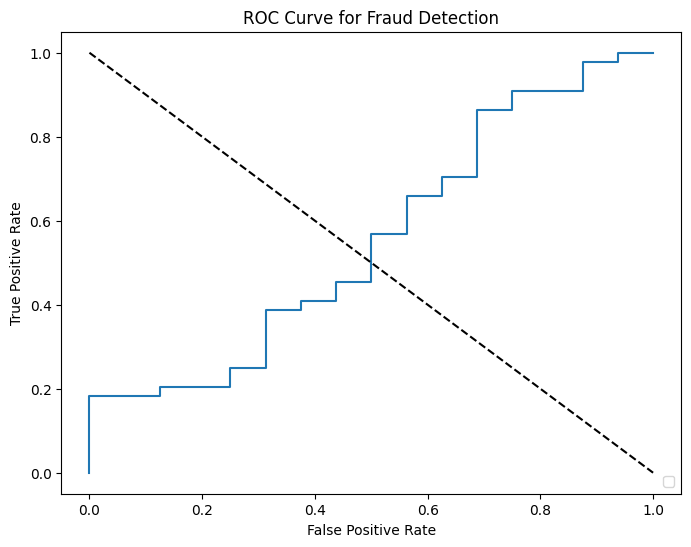

In [71]:
#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [1,0], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection')
plt.legend(loc='lower right')
plt.show()

In [ ]:
label=f'ROC Curve (area = {roc_auc_score:.2f})